In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


In [2]:
import sqlite3
conn = sqlite3.connect('../data/hist_prices.db')
c = conn.cursor()

In [3]:
data = pd.read_sql('''SELECT * FROM tether''', conn)
data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Tether,USDT,2015-02-26 23:59:59,1.212320,1.194710,1.210420,1.205740,5.955460,303364.1840
1,2,Tether,USDT,2015-03-02 23:59:59,0.607890,0.568314,0.571249,0.606502,3.032500,152595.9032
2,3,Tether,USDT,2015-03-03 23:59:59,0.606229,0.604416,0.605129,0.606229,3.031130,152527.2164
3,4,Tether,USDT,2015-03-06 23:59:59,1.000000,1.000000,1.000000,1.000000,92.647202,251600.0000
4,5,Tether,USDT,2015-03-07 23:59:59,1.000000,1.000000,1.000000,1.000000,58196.800781,251600.0000


In [4]:
# Add some more features derived from the exiting ones
data['Range'] = data.High - data.Low
data['Difference'] = data.Close - data.Open

In [5]:
data.drop(labels='SNo', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        2318 non-null   object 
 1   Symbol      2318 non-null   object 
 2   Date        2318 non-null   object 
 3   High        2318 non-null   float64
 4   Low         2318 non-null   float64
 5   Open        2318 non-null   float64
 6   Close       2318 non-null   float64
 7   Volume      2318 non-null   float64
 8   Marketcap   2318 non-null   float64
 9   Range       2318 non-null   float64
 10  Difference  2318 non-null   float64
dtypes: float64(8), object(3)
memory usage: 199.3+ KB


In [6]:
#Converting Date column to Datetime
data['Date'] = pd.to_datetime(data['Date'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Name        2318 non-null   object        
 1   Symbol      2318 non-null   object        
 2   Date        2318 non-null   datetime64[ns]
 3   High        2318 non-null   float64       
 4   Low         2318 non-null   float64       
 5   Open        2318 non-null   float64       
 6   Close       2318 non-null   float64       
 7   Volume      2318 non-null   float64       
 8   Marketcap   2318 non-null   float64       
 9   Range       2318 non-null   float64       
 10  Difference  2318 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 199.3+ KB


In [8]:
data.describe()

,High,Low,Open,Close,Volume,Marketcap,Range,Difference
count,2318.000000,2318.000000,2318.000000,2318.000000,2.318000e+03,2.318000e+03,2318.000000,2318.000000
mean,1.006776,0.995670,1.000656,1.000696,1.938484e+10,6.128741e+09,0.011106,0.000040
std,0.018511,0.016425,0.015449,0.014951,3.485057e+10,1.262068e+10,0.015351,0.005201
min,0.606229,0.568314,0.571249,0.606229,1.104970e-01,1.525272e+05,0.000000,-0.053790
25%,1.000000,0.994445,1.000000,1.000000,9.858018e+05,6.951590e+06,0.000000,-0.000654
50%,1.003205,0.999677,1.000010,1.000020,2.507340e+09,2.021074e+09,0.007675,0.000000
75%,1.011339,1.000000,1.002278,1.002228,2.460318e+10,4.133154e+09,0.016629,0.000757
max,1.212320,1.194710,1.210420,1.205740,2.790675e+11,6.274650e+10,0.209370,0.059060


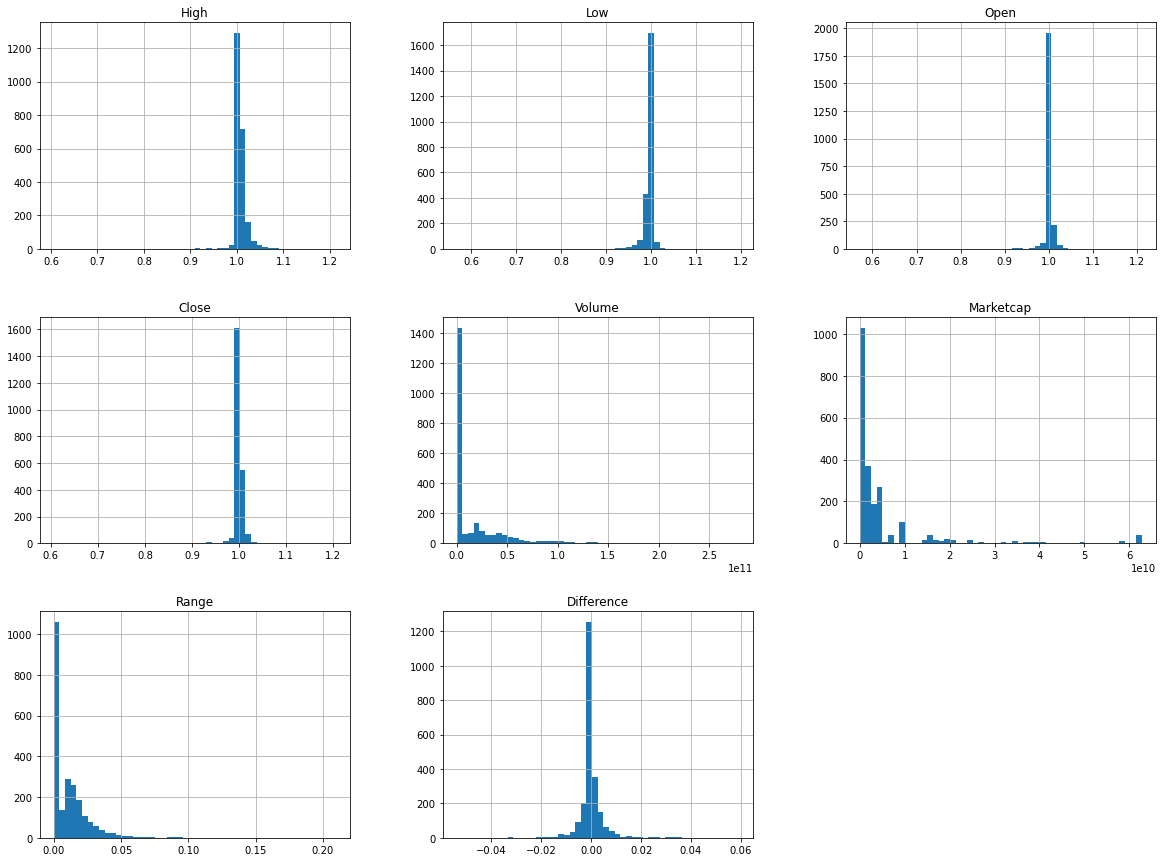

In [9]:
data[['High','Low','Open','Close','Volume','Marketcap','Range','Difference']].hist(bins=50, figsize = (20, 15))
plt.show();

In [10]:
#Days with the biggest price loss
data[['Date', 'Difference']].sort_values(by='Difference').head(10).T

,1016,781,1837,884,837,1027,526,816,917,818
Date,2017-12-13 23:59:59,2017-04-22 23:59:59,2020-03-13 23:59:59,2017-08-03 23:59:59,2017-06-17 23:59:59,2017-12-24 23:59:59,2016-08-10 23:59:59,2017-05-27 23:59:59,2017-09-05 23:59:59,2017-05-29 23:59:59
Difference,-0.05379,-0.043071,-0.039976,-0.033266,-0.032316,-0.02768,-0.025997,-0.02388,-0.0221,-0.0216


In [11]:
# Days with the biggest price gain
data[['Date', 'Difference']].sort_values(by='Difference', ascending=False).head(10).T

,1015,1836,529,885,1,808,843,1026,1071,1843
Date,2017-12-12 23:59:59,2020-03-12 23:59:59,2016-08-13 23:59:59,2017-08-04 23:59:59,2015-03-02 23:59:59,2017-05-19 23:59:59,2017-06-23 23:59:59,2017-12-23 23:59:59,2018-02-06 23:59:59,2020-03-19 23:59:59
Difference,0.05906,0.054601,0.037941,0.035898,0.035253,0.033956,0.033504,0.03287,0.03159,0.029909


In [12]:
fig = px.line(data, x='Date', y="Close")
fig.show();

In [13]:
fig = px.line(data, x='Date', y="Marketcap")
fig.show();

In [14]:
fig = px.line(data, x='Date', y="Difference")
fig.show();

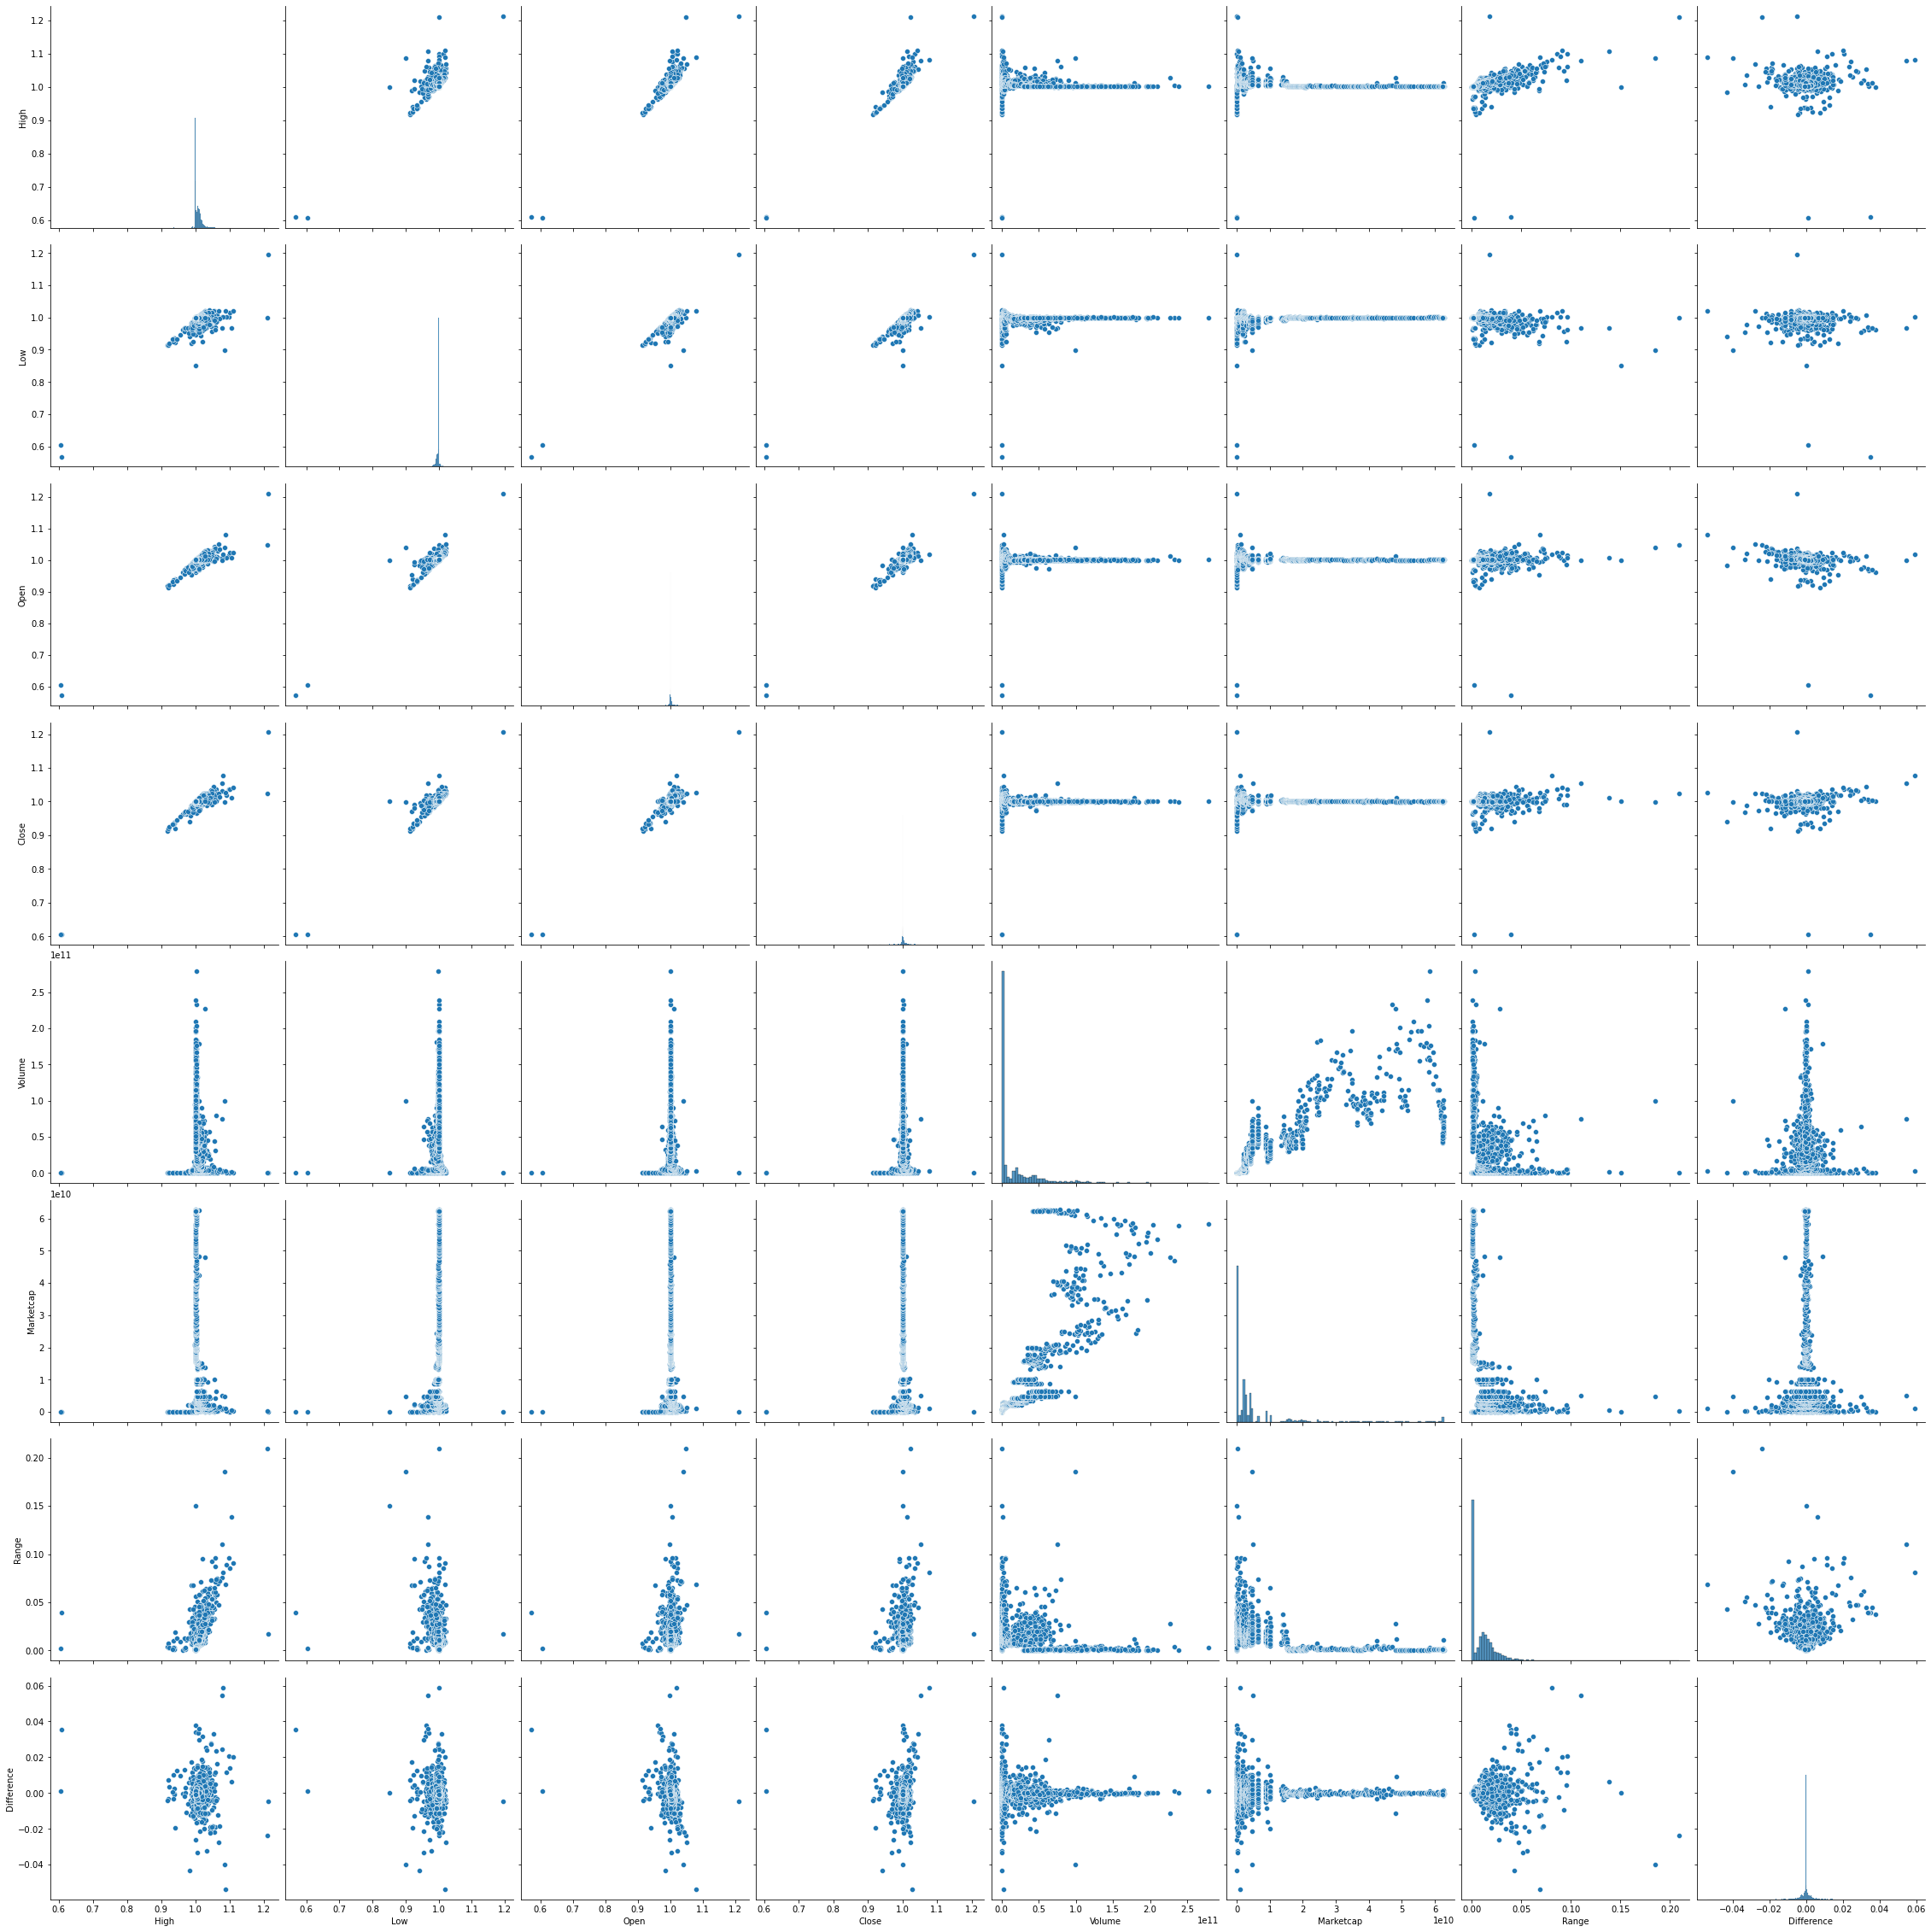

In [15]:
sns.pairplot(data,height=4);
